In [1]:
import h5py
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
from astropy.visualization import ImageNormalize, LogStretch
plt.style.use("science")
params = {'legend.fontsize': 27,
          'figure.figsize': (10, 10),
         'axes.labelsize': 27,
         'axes.titlesize': 30,#'x-large',
         'xtick.labelsize':20,
         'ytick.labelsize':20,
         'figure.titlesize': 40
         }
pylab.rcParams.update(params)

In [2]:
hf = h5py.File(os.path.join(os.getenv('CENSAI_PATH'), "results", "k50_vae_ranking_220111.h5"), "r")
hf.keys()

<KeysViewHDF5 ['sample_00', 'sample_01', 'sample_02', 'sample_03', 'sample_04']>

In [3]:
hf["sample_00"].keys()

<KeysViewHDF5 ['matched_kappa', 'matched_noise_rms', 'matched_obs', 'matched_psf', 'matched_source', 'obs_L2_distance', 'vae_kappa', 'vae_obs', 'vae_psf', 'vae_source']>

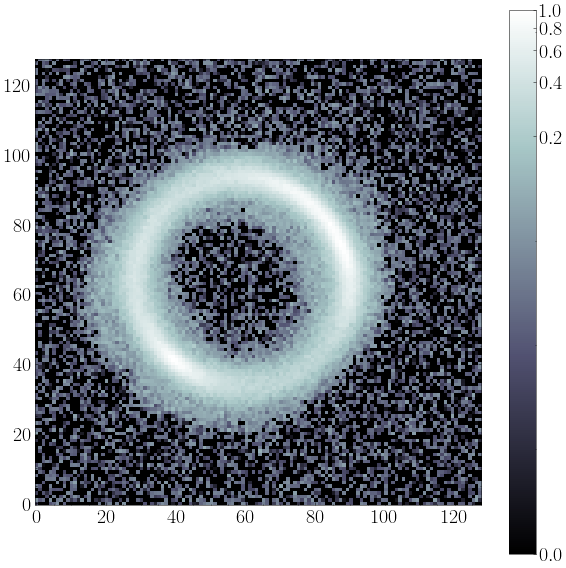

In [9]:
plt.imshow(hf["sample_02"]["matched_obs"][9], cmap="bone", norm=ImageNormalize(stretch=LogStretch()), origin="lower")
plt.colorbar()

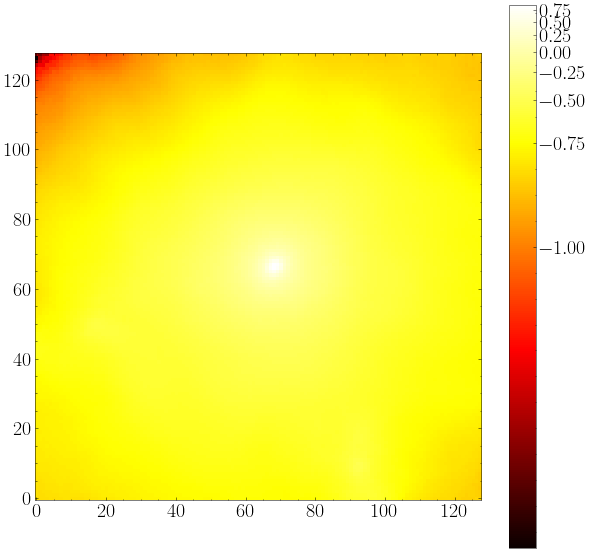

In [33]:
plt.imshow(hf["sample_17"]["vae_kappa"], cmap="hot", norm=ImageNormalize(stretch=LogStretch()), origin="lower")
plt.colorbar()

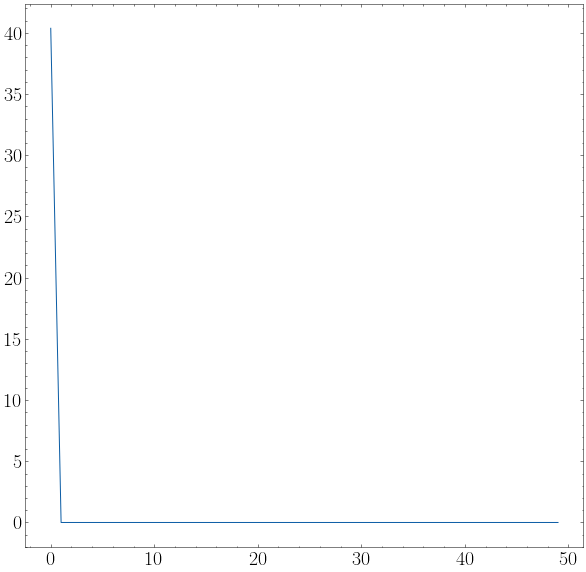

In [37]:
plt.plot(hf["sample_17"]["obs_L2_distance"])

In [6]:
np.array(hf["sample_00"]["obs_L2_distance"])

array([6.9419084, 7.251131 , 7.594086 , 8.179489 , 8.479159 ],
      dtype=float32)